Data loaded successfully.
  S. No                    City   Juveniles Apprehended - Boys  \
0     1     Ahmedabad (Gujarat)                            298   
1     2    Bengaluru(Karnataka)                            197   
2     3     Chennai(Tamil Nadu)                            816   
3     4  Coimbatore(Tamil Nadu)                             35   
4     5                  Delhi                            3073   

    Juveniles Apprehended - Girls   Juveniles Apprehended - Total  \
0                               0                             298   
1                               3                             200   
2                               0                             816   
3                               0                              35   
4                               2                            3075   

   18 and above and below 30 years - Male  \
0                                   14488   
1                                   13577   
2                          

C:\Users\manik\AppData\Local\Temp\ipykernel_23148\2031549579.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_arrests_col, y='City', data=top_cities, palette='viridis')


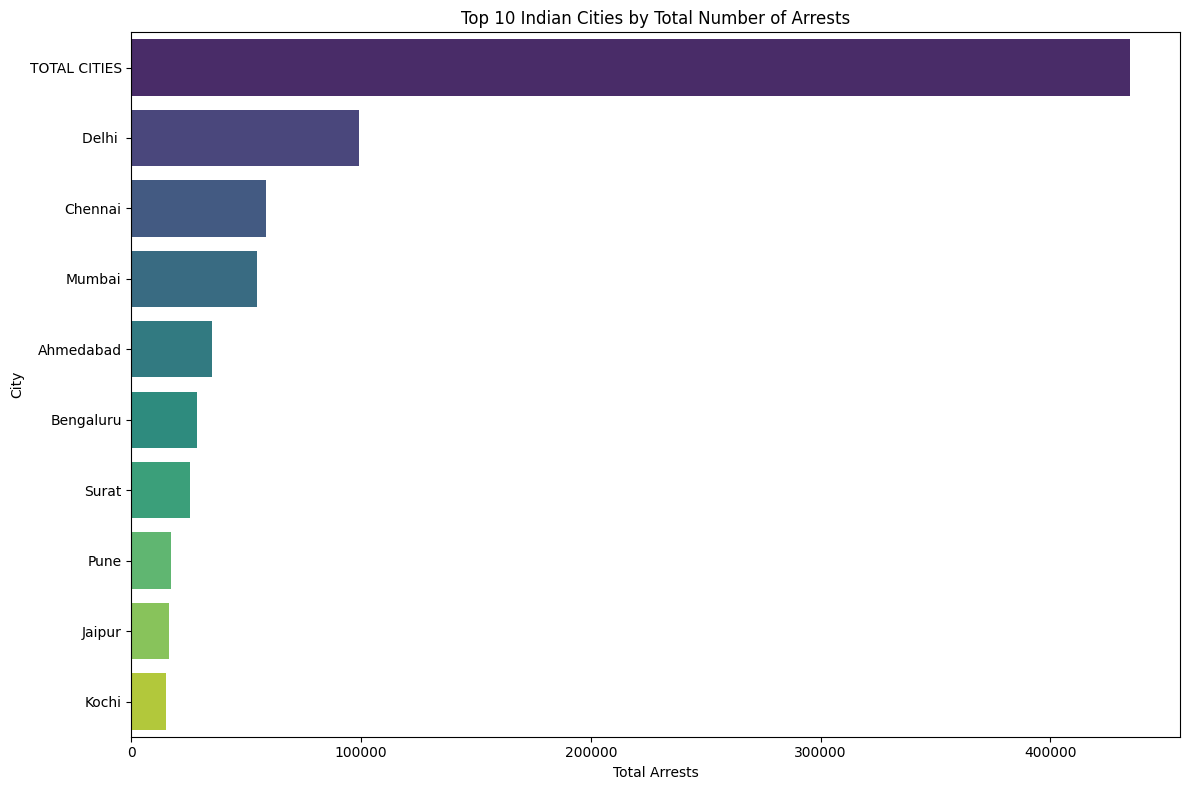

C:\Users\manik\AppData\Local\Temp\ipykernel_23148\2031549579.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Arrests', y='Age Group', data=age_distribution, palette='plasma')


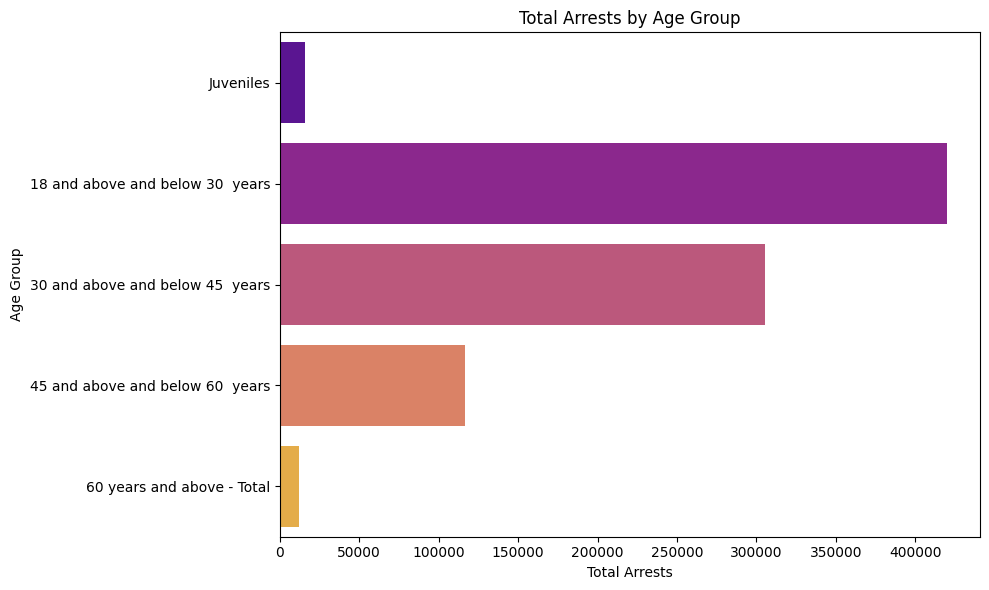

C:\Users\manik\AppData\Local\Temp\ipykernel_23148\2031549579.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total Arrests', data=gender_distribution, palette='coolwarm')


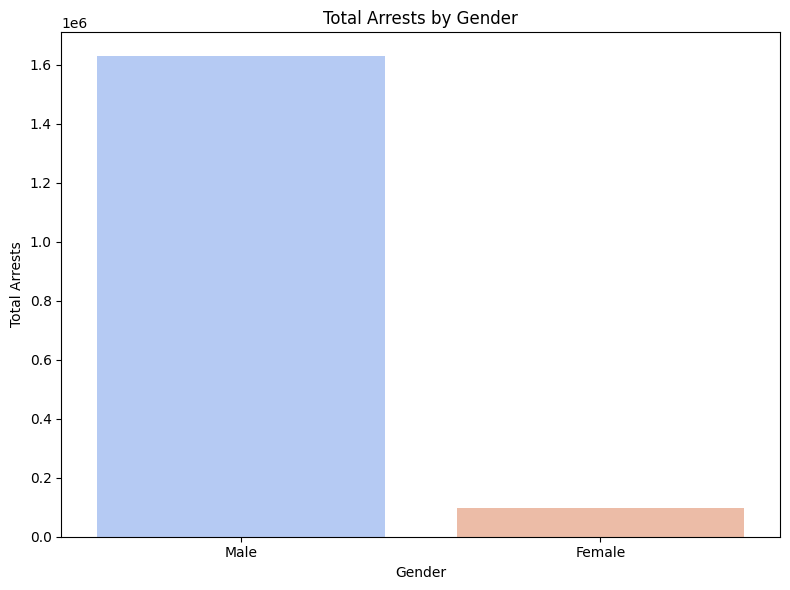

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Cleaning ---

# Load the provided CSV file
# It's important to use the correct file name.
try:
    df = pd.read_csv('crime_data.csv')
    print("Data loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print("Error: The file 'crime_data.csv' was not found. Please check the file path.")
    exit()

# Clean the column names by removing leading/trailing whitespace
df.columns = df.columns.str.strip()

# Clean the 'City' column to remove the state information in parentheses
df['City'] = df['City'].str.replace(r'\s*\(.*\)', '', regex=True)

# --- 2. Data Analysis and Visualization ---

# Identify the column with total arrests using a robust method to handle whitespace
total_arrests_col = [col for col in df.columns if 'Total Persons Arrested' in col][0]

# Find the top 10 cities with the highest total arrests
top_cities = df.sort_values(by=total_arrests_col, ascending=False).head(10)

# Create a bar chart for the top 10 cities
plt.figure(figsize=(12, 8))
sns.barplot(x=total_arrests_col, y='City', data=top_cities, palette='viridis')
plt.title('Top 10 Indian Cities by Total Number of Arrests')
plt.xlabel('Total Arrests')
plt.ylabel('City')
plt.tight_layout()
plt.savefig('top_10_cities.png')
plt.show()

# Analyze the age distribution of arrests
# Select columns related to total arrests by age group
age_cols = [col for col in df.columns if 'Total' in col and 'Total Persons Arrested' not in col and 'Male' not in col and 'Female' not in col]
age_gender_data = df[age_cols]

# Sum up the total arrests for each age group
age_distribution = age_gender_data.sum().reset_index()
age_distribution.columns = ['Age Group', 'Total Arrests']

# Clean up the age group labels for better visualization
age_distribution['Age Group'] = age_distribution['Age Group'].str.replace('Juveniles Apprehended - Total', 'Juveniles')
age_distribution['Age Group'] = age_distribution['Age Group'].str.replace(r'years - Total', ' years', regex=True)

# Create a bar chart for the age distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Arrests', y='Age Group', data=age_distribution, palette='plasma')
plt.title('Total Arrests by Age Group')
plt.xlabel('Total Arrests')
plt.ylabel('Age Group')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

# Analyze the gender distribution of arrests
# Select columns related to total arrests by gender
gender_cols = [col for col in df.columns if 'Male' in col or 'Female' in col]
gender_data = df[gender_cols]

# Sum up the total arrests for each gender
gender_distribution_male = gender_data[[col for col in gender_cols if 'Male' in col]].sum().sum()
gender_distribution_female = gender_data[[col for col in gender_cols if 'Female' in col]].sum().sum()

gender_distribution = pd.DataFrame({'Gender': ['Male', 'Female'], 'Total Arrests': [gender_distribution_male, gender_distribution_female]})

# Create a bar chart for gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Total Arrests', data=gender_distribution, palette='coolwarm')
plt.title('Total Arrests by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Arrests')
plt.tight_layout()
plt.savefig('gender_distribution.png')
plt.show()